# Space Server Dataset

Feature Description

>The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"

>objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

>u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

>run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"

>specobjid = Object Identifier
class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

>redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Acknowledgements

>The data released by the SDSS is under public domain. Its taken from the current data release RD14.

More information about the license:

http://www.sdss.org/science/image-gallery/

It was acquired by querying the CasJobs database which contains all data published by the SDSS.

The exact query can be found at:

http://skyserver.sdss.org/CasJobs/ (Free account is required!)

There are also other ways to get data from the SDSS catalogue. They can be found under:

http://www.sdss.org/dr14/

They really have a huge database which offers the possibility of creating all kinds of tables with respect to personal interests.

Please don't hesitate to contact me regarding any questions or improvement suggestions. :-)

Inspiration

>The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!

Content

>The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading space dataset
ssd=pd.read_csv("space_server_dataset.csv")
ssd

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
#checking dtypes
ssd.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [4]:
#checking null values
ssd.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [5]:
ssd["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

SUMMARY STATISTICS

In [6]:
ssd.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


observations

columns ra minimum value 8.23 and maximum 260

in column plate, rum and field std is very high (273.30)



Checking Correlations

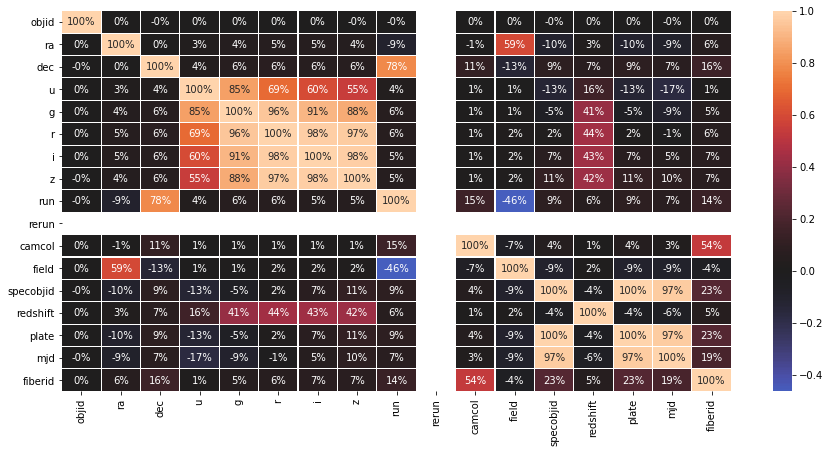

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(ssd.corr(),annot=True,fmt="0.0%",linewidth=.1,center=0)

In [8]:
ssd["rerun"].value_counts()

301    10000
Name: rerun, dtype: int64

In [9]:
ssd["objid"].value_counts()

1.237650e+18    10000
Name: objid, dtype: int64

rerun column have same value(301) so i have to drop this column

In [10]:
#droping rerum and objid columns
ssd.drop(["rerun","objid"],axis=1,inplace=True)

# Analysis with Visulization

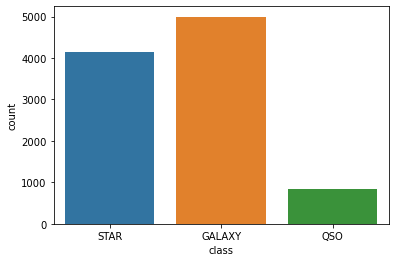

In [11]:
#COUTPLOT FOR CLASS
sns.countplot(ssd["class"])

GALAXY CLASS HAVE MOST OSERVATIONS AND QSO HAVE LEAST

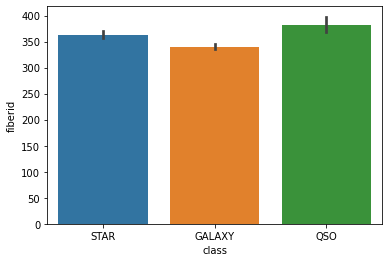

In [12]:
sns.barplot(x=ssd["class"],y=ssd["fiberid"])

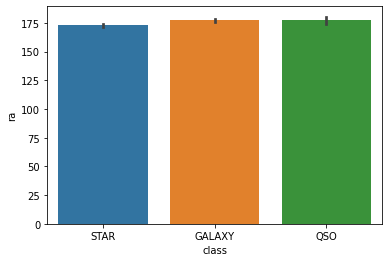

In [13]:
sns.barplot(ssd["class"],ssd["ra"])

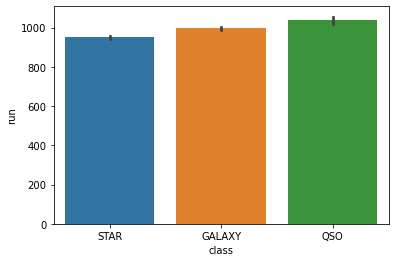

In [14]:
sns.barplot(ssd["class"],ssd["run"])

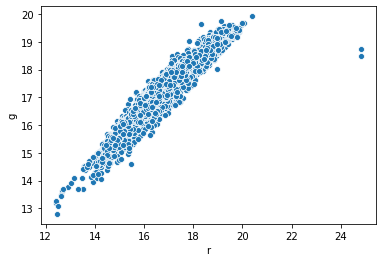

In [15]:
sns.scatterplot(ssd["r"],ssd["g"])

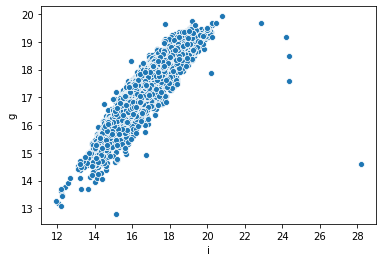

In [16]:
sns.scatterplot(ssd["i"],ssd["g"])

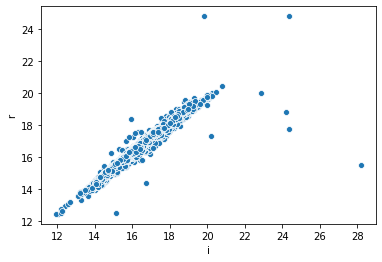

In [17]:
sns.scatterplot(ssd["i"],ssd["r"])

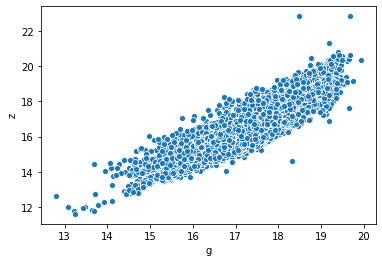

In [18]:
sns.scatterplot(ssd["g"],ssd["z"])

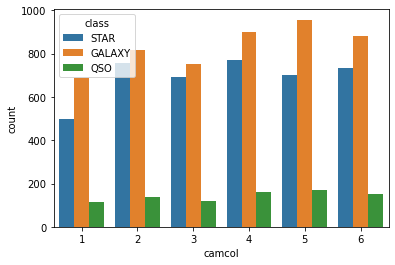

In [19]:
#  class vs camcol
sns.countplot(x="camcol",hue="class",data=ssd)

4,5,6 b/w 400 to 500

checking skewness with distribution plot 

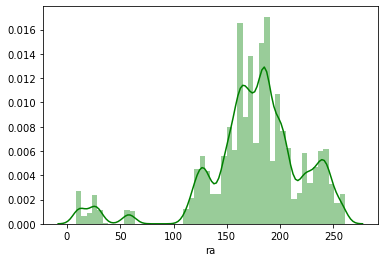

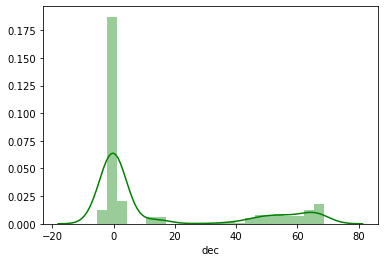

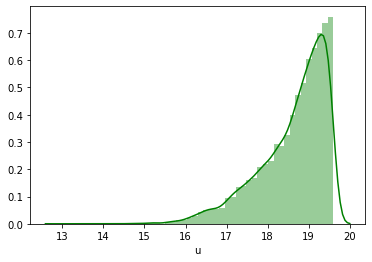

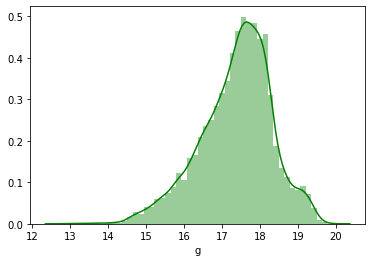

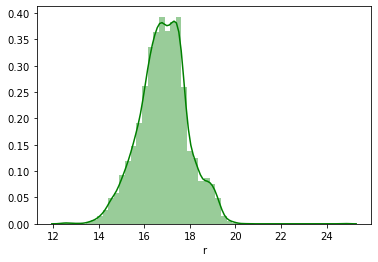

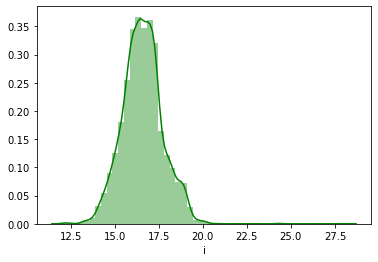

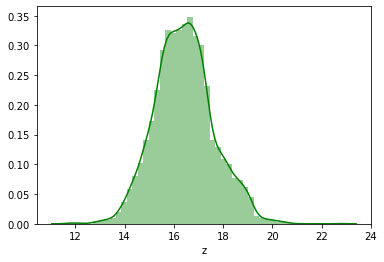

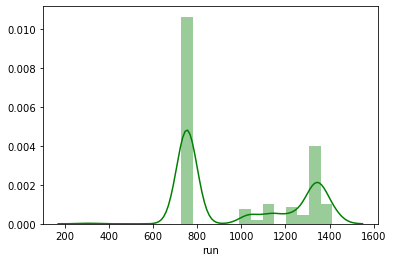

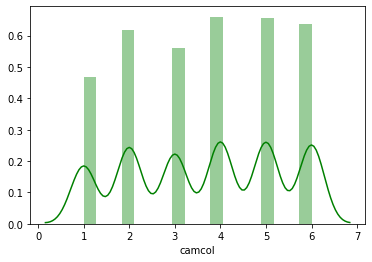

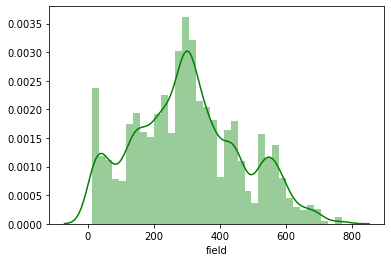

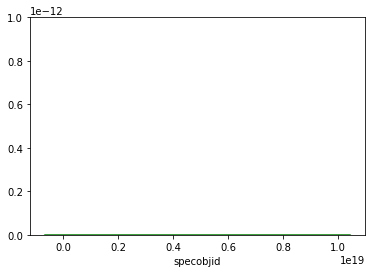

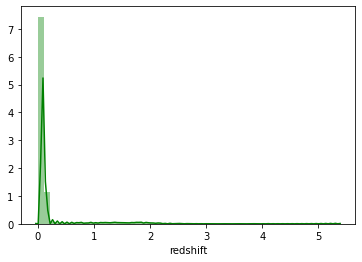

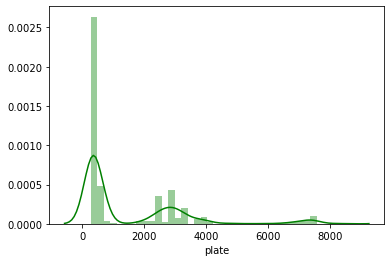

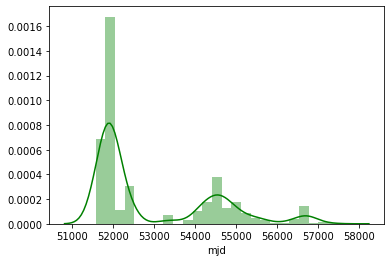

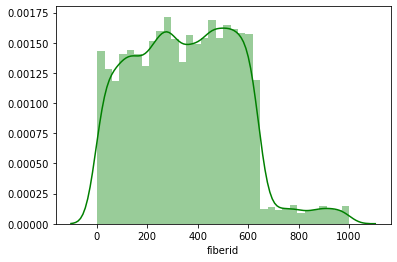

In [20]:
for col in ssd.describe().columns:
    sns.distplot(ssd[col],color="g")
    plt.show()

In [21]:
ssd

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


CHANGING TARGET VALUE INTO NUMETIC FORM

In [22]:
ssd["class"]=pd.factorize(ssd['class'])[0]
ssd['class'].value_counts()

1    4998
0    4152
2     850
Name: class, dtype: int64

In [23]:
#checking skewness
ssd.skew()


ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [24]:
#Treating skewness 
for col in ssd.columns:
    if ssd.skew().loc[col]>.55:
        ssd[col]=np.sqrt(ssd[col])
    if ssd.skew().loc[col]<-.55:    
        ssd[col]=np.sqrt(ssd[col])

In [25]:
ssd

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,13.547373,0.299488,4.412942,17.04240,15.94699,15.50342,15.22531,752,4,267,1.929342e+09,0,NaN,57.497826,234.354432,491
1,13.549848,0.367811,4.320046,17.21449,16.67637,16.48922,16.39150,752,4,267,6.031700e+08,0,NaN,17.972201,227.189348,541
2,13.552867,0.355225,4.402611,18.19169,17.47428,17.08732,16.80125,752,4,268,5.685719e+08,1,0.350872,16.941074,228.085510,513
3,13.559887,0.223407,4.214897,16.60272,16.16116,15.98233,15.90438,752,4,269,1.929344e+09,0,NaN,57.497826,234.354432,510
4,13.560357,0.320245,4.189302,16.26342,16.43869,16.55492,16.61326,752,4,269,1.929344e+09,0,0.024297,57.497826,234.354432,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.459337,7.179105,4.337945,17.47053,16.91508,16.68305,16.50570,1345,3,161,7.094681e+08,1,0.166081,21.142375,227.765230,246
9996,11.458887,7.188278,4.274640,17.43849,17.07692,16.71661,16.69897,1345,3,162,7.094646e+08,1,0.343180,21.142375,227.765230,228
9997,11.469637,7.187975,4.331071,17.77784,17.51872,17.43302,17.42048,1345,3,162,2.867511e+09,0,NaN,85.457592,238.773952,622
9998,11.466349,7.193961,4.345442,17.91068,17.53152,17.36284,17.13988,1345,3,163,7.094646e+08,1,0.118402,21.142375,227.765230,229


In [26]:
ssd.skew()

ra          -2.344131
dec          0.298224
u           -1.290898
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.093905
class        0.381391
redshift     2.268173
plate        1.093870
mjd          1.025184
fiberid      0.308053
dtype: float64

ra              AxesSubplot(0.125,0.657941;0.110714x0.222059)
dec          AxesSubplot(0.257857,0.657941;0.110714x0.222059)
u            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
g            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
r            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
i            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
z               AxesSubplot(0.125,0.391471;0.110714x0.222059)
run          AxesSubplot(0.257857,0.391471;0.110714x0.222059)
camcol       AxesSubplot(0.390714,0.391471;0.110714x0.222059)
field        AxesSubplot(0.523571,0.391471;0.110714x0.222059)
specobjid    AxesSubplot(0.656429,0.391471;0.110714x0.222059)
class        AxesSubplot(0.789286,0.391471;0.110714x0.222059)
redshift           AxesSubplot(0.125,0.125;0.110714x0.222059)
plate           AxesSubplot(0.257857,0.125;0.110714x0.222059)
mjd             AxesSubplot(0.390714,0.125;0.110714x0.222059)
fiberid         AxesSubplot(0.523571,0.125;0.110714x0.222059)
dtype: o

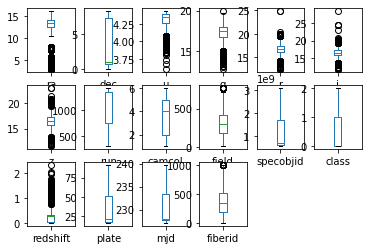

In [27]:
#ploting outliers with boplot
ssd.plot(kind="box",subplots=True,layout=(3,6))

In [28]:
ssd

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,13.547373,0.299488,4.412942,17.04240,15.94699,15.50342,15.22531,752,4,267,1.929342e+09,0,NaN,57.497826,234.354432,491
1,13.549848,0.367811,4.320046,17.21449,16.67637,16.48922,16.39150,752,4,267,6.031700e+08,0,NaN,17.972201,227.189348,541
2,13.552867,0.355225,4.402611,18.19169,17.47428,17.08732,16.80125,752,4,268,5.685719e+08,1,0.350872,16.941074,228.085510,513
3,13.559887,0.223407,4.214897,16.60272,16.16116,15.98233,15.90438,752,4,269,1.929344e+09,0,NaN,57.497826,234.354432,510
4,13.560357,0.320245,4.189302,16.26342,16.43869,16.55492,16.61326,752,4,269,1.929344e+09,0,0.024297,57.497826,234.354432,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.459337,7.179105,4.337945,17.47053,16.91508,16.68305,16.50570,1345,3,161,7.094681e+08,1,0.166081,21.142375,227.765230,246
9996,11.458887,7.188278,4.274640,17.43849,17.07692,16.71661,16.69897,1345,3,162,7.094646e+08,1,0.343180,21.142375,227.765230,228
9997,11.469637,7.187975,4.331071,17.77784,17.51872,17.43302,17.42048,1345,3,162,2.867511e+09,0,NaN,85.457592,238.773952,622
9998,11.466349,7.193961,4.345442,17.91068,17.53152,17.36284,17.13988,1345,3,163,7.094646e+08,1,0.118402,21.142375,227.765230,229


In [29]:
ssd.isnull().sum()

ra              0
dec          3774
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
class           0
redshift     1919
plate           0
mjd             0
fiberid         0
dtype: int64

After Treating skewness ssd dataset have NaN valus in columns dec and redshift.

In [30]:
#Imputing Missing value into continuous value
ssd["dec"]=ssd["dec"].replace(np.NaN,ssd["dec"].mean())
ssd["redshift"]=ssd["redshift"].replace(np.NaN,ssd["redshift"].mean())

In [31]:
ssd.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [32]:
#checking skewness
thresholds=3
z=np.abs(zscore(ssd))
np.where(z>3)

(array([  45,  109,  129, ..., 9929, 9940, 9956], dtype=int64),
 array([12, 12, 12, ...,  2, 12, 12], dtype=int64))

In [33]:
#removing outliers
ssd_new=ssd[(z<3).all(axis=1)]
ssd_new.shape

(9022, 16)

## Model Training

In [34]:
X=ssd_new.drop("class",axis=1)
print(X)
y=ssd_new["class"]
print(y)

             ra       dec         u         g         r         i         z  \
0     13.547373  0.299488  4.412942  17.04240  15.94699  15.50342  15.22531   
1     13.549848  0.367811  4.320046  17.21449  16.67637  16.48922  16.39150   
2     13.552867  0.355225  4.402611  18.19169  17.47428  17.08732  16.80125   
3     13.559887  0.223407  4.214897  16.60272  16.16116  15.98233  15.90438   
4     13.560357  0.320245  4.189302  16.26342  16.43869  16.55492  16.61326   
...         ...       ...       ...       ...       ...       ...       ...   
9995  11.459337  7.179105  4.337945  17.47053  16.91508  16.68305  16.50570   
9996  11.458887  7.188278  4.274640  17.43849  17.07692  16.71661  16.69897   
9997  11.469637  7.187975  4.331071  17.77784  17.51872  17.43302  17.42048   
9998  11.466349  7.193961  4.345442  17.91068  17.53152  17.36284  17.13988   
9999  11.474538  7.197590  4.390428  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid  redshift  

In [35]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[ 0.0959752 , -1.281625  ,  1.06751108, ...,  1.27272497,
         1.34154222,  0.67370668],
       [ 0.09773468, -1.25573218,  0.04454204, ..., -0.71054763,
        -0.87911859,  0.92298166],
       [ 0.09988191, -1.26050186,  0.95373819, ..., -0.76228634,
        -0.60137283,  0.78338767],
       ...,
       [-1.38154473,  1.32894381,  0.16595091, ...,  2.67565881,
         2.71127537,  1.32680714],
       [-1.38388282,  1.33121212,  0.32420381, ..., -0.5514782 ,
        -0.70063668, -0.63249424],
       [-1.37805952,  1.33258776,  0.81958627, ..., -0.5514782 ,
        -0.70063668, -0.61255225]])

In [36]:
# covert into pandas dataframe
x=pd.DataFrame(x,columns=X.columns)
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.095975,-1.281625,1.067511,-0.346601,-0.877088,-0.994121,-1.033003,-0.808861,0.182755,-0.273219,1.272731,0.248430,1.272725,1.341542,0.673707
1,0.097735,-1.255732,0.044542,-0.145528,-0.113300,-0.026927,0.036429,-0.808861,0.182755,-0.273219,-0.710475,0.248430,-0.710548,-0.879119,0.922982
2,0.099882,-1.260502,0.953738,0.996248,0.722251,0.559884,0.412182,-0.808861,0.182755,-0.266975,-0.762215,0.624606,-0.762286,-0.601373,0.783388
3,0.104874,-1.310458,-1.113355,-0.860330,-0.652815,-0.524250,-0.410275,-0.808861,0.182755,-0.260731,1.272735,0.248430,1.272725,1.341542,0.768431
4,0.105208,-1.273759,-1.395213,-1.256774,-0.362192,0.037533,0.239789,-0.808861,0.182755,-0.260731,1.272735,-1.201944,1.272725,1.341542,0.778402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9017,-1.388869,1.325582,0.241646,0.153633,0.136671,0.163245,0.141153,1.322357,-0.412485,-0.935133,-0.551513,-0.408940,-0.551478,-0.700637,-0.547741
9018,-1.389189,1.329059,-0.455467,0.116197,0.306145,0.196171,0.318388,1.322357,-0.412485,-0.928889,-0.551519,0.581581,-0.551478,-0.700637,-0.637480
9019,-1.381545,1.328944,0.165951,0.512699,0.768787,0.899060,0.980035,1.322357,-0.412485,-0.928889,2.675704,0.248430,2.675659,2.711275,1.326807
9020,-1.383883,1.331212,0.324204,0.667911,0.782191,0.830204,0.722716,1.322357,-0.412485,-0.922644,-0.551519,-0.675614,-0.551478,-0.700637,-0.632494


In [42]:
# library for split data 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#importing ensembling techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# creating loop for all algorithms
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)

#creating loop for all models
for m in models:
    print("*************************",m,"************************")
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("ac:",accuracy_score(y_test,pred))
    print("score:",m.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("\n")

************************* LogisticRegression() ************************
ac: 0.949468085106383
score: 0.9459060005911912
[[ 920   55    2]
 [  44 1135    5]
 [   1    7   87]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       977
           1       0.95      0.96      0.95      1184
           2       0.93      0.92      0.92        95

    accuracy                           0.95      2256
   macro avg       0.94      0.94      0.94      2256
weighted avg       0.95      0.95      0.95      2256



************************* DecisionTreeClassifier() ************************
ac: 0.9809397163120568
score: 1.0
[[ 971    6    0]
 [   9 1158   17]
 [   0   11   84]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       977
           1       0.99      0.98      0.98      1184
           2       0.83      0.88      0.86        95

    accuracy                           0.98      2256
   ma

## Cross Valication Score 

In [39]:
#loop for cross valication score to all algorithms
for c in models:
    print("ccccccccccccccccccccccc",c,"cccccccccccccccccccccc")
    cross=cross_val_score(c,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print("\n")

ccccccccccccccccccccccc LogisticRegression() cccccccccccccccccccccc
0.9466840078373083
[0.95457064 0.95567867 0.93791574 0.93292683 0.95232816]


ccccccccccccccccccccccc DecisionTreeClassifier() cccccccccccccccccccccc
0.9799377191958774
[0.97839335 0.9833795  0.9695122  0.9789357  0.98946785]


ccccccccccccccccccccccc KNeighborsClassifier() cccccccccccccccccccccc
0.9187521727647395
[0.92520776 0.93019391 0.90964523 0.90354767 0.9251663 ]


ccccccccccccccccccccccc SVC() cccccccccccccccccccccc
0.9401449533508179
[0.94404432 0.94847645 0.93847007 0.9251663  0.94456763]


ccccccccccccccccccccccc RandomForestClassifier() cccccccccccccccccccccc
0.9761693620209936
[0.97562327 0.9767313  0.9789357  0.96618625 0.98337029]


ccccccccccccccccccccccc AdaBoostClassifier() cccccccccccccccccccccc
0.9030225844691083
[0.7933518  0.94293629 0.9440133  0.89523282 0.93957871]


ccccccccccccccccccccccc GradientBoostingClassifier() cccccccccccccccccccccc
0.9892482694658223
[0.99168975 0.98891967 0.99223947 

all algorithms working well, have no underfitting and overfitting. 

In [40]:
#chooseing best algorithms
max_ac=0
for r in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    dtc= DecisionTreeClassifier() 
    dtc.fit(x_train,y_train)
    predg=dtc.predict(x_test)
    AC=accuracy_score(y_test,predg)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,predg))
print("CR:",classification_report(y_test,predg))

max accuracy_score corresponding to 82 is 0.9884393063583815
[[ 911    3    0]
 [   9 1044   10]
 [   0   11   88]]
CR:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       914
           1       0.99      0.98      0.98      1063
           2       0.90      0.89      0.89        99

    accuracy                           0.98      2076
   macro avg       0.96      0.96      0.96      2076
weighted avg       0.98      0.98      0.98      2076



In [41]:
max_ac=0
for r in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    gbc= GradientBoostingClassifier()  
    gbc.fit(x_train,y_train)
    predg=gbc.predict(x_test)
    AC=accuracy_score(y_test,predg)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,predg))
print("CR:",classification_report(y_test,predg))

max accuracy_score corresponding to 40 is 0.9932562620423893
[[ 912    2    0]
 [   3 1055    5]
 [   0    6   93]]
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       914
           1       0.99      0.99      0.99      1063
           2       0.95      0.94      0.94        99

    accuracy                           0.99      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.99      0.99      0.99      2076



USEING GRIDSEARCHCV

In [47]:


para={"criterion":['gini','entropy']}

clf=GridSearchCV(dtc,para)
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [48]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [49]:
print(clf.best_params_)

{'criterion': 'entropy'}


In [50]:
max_ac=0
for r in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    dtc= DecisionTreeClassifier(criterion="entropy") 
    dtc.fit(x_train,y_train)
    predg=dtc.predict(x_test)
    AC=accuracy_score(y_test,predg)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,predg))
print("CR:",classification_report(y_test,predg))

max accuracy_score corresponding to 41 is 0.9913294797687862
[[ 911    3    0]
 [   3 1050   10]
 [   0    8   91]]
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       914
           1       0.99      0.99      0.99      1063
           2       0.90      0.92      0.91        99

    accuracy                           0.99      2076
   macro avg       0.96      0.97      0.97      2076
weighted avg       0.99      0.99      0.99      2076



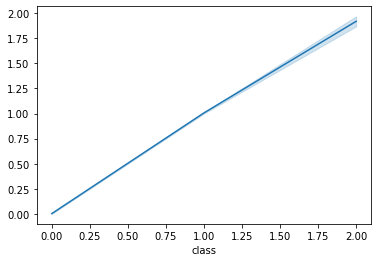

In [55]:
#ploting accuracy
sns.lineplot(y_test,predg)

In [56]:
#saving best model
import joblib

joblib.dump(dtc,"space_server_dataset.pkl")

['space_server_dataset.pkl']